In [82]:
%pip install Faker

Note: you may need to restart the kernel to use updated packages.


In [83]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta

# Initialize Faker
fake = Faker()
np.random.seed(42)
random.seed(42)

# Realistic US cities by state (top 3-5 major cities per state)
state_cities = {
    'Alabama': ['Birmingham', 'Montgomery', 'Mobile', 'Huntsville', 'Tuscaloosa'],
    'Alaska': ['Anchorage', 'Fairbanks', 'Juneau', 'Sitka'],
    'Arizona': ['Phoenix', 'Tucson', 'Mesa', 'Chandler', 'Scottsdale'],
    'Arkansas': ['Little Rock', 'Fort Smith', 'Fayetteville', 'Springdale', 'Jonesboro'],
    'California': ['Los Angeles', 'San Diego', 'San Jose', 'San Francisco', 'Fresno'],
    'Colorado': ['Denver', 'Colorado Springs', 'Aurora', 'Fort Collins', 'Lakewood'],
    'Connecticut': ['Bridgeport', 'New Haven', 'Stamford', 'Hartford', 'Waterbury'],
    'Delaware': ['Wilmington', 'Dover', 'Newark', 'Middletown', 'Smyrna'],
    'Florida': ['Jacksonville', 'Miami', 'Tampa', 'Orlando', 'St. Petersburg'],
    'Georgia': ['Atlanta', 'Augusta', 'Columbus', 'Savannah', 'Athens'],
    'Hawaii': ['Honolulu', 'Pearl City', 'Hilo', 'Kailua', 'Waipahu'],
    'Idaho': ['Boise', 'Nampa', 'Meridian', 'Idaho Falls', 'Pocatello'],
    'Illinois': ['Chicago', 'Aurora', 'Rockford', 'Joliet', 'Naperville'],
    'Indiana': ['Indianapolis', 'Fort Wayne', 'Evansville', 'South Bend', 'Carmel'],
    'Iowa': ['Des Moines', 'Cedar Rapids', 'Davenport', 'Sioux City', 'Iowa City'],
    'Kansas': ['Wichita', 'Overland Park', 'Kansas City', 'Olathe', 'Topeka'],
    'Kentucky': ['Louisville', 'Lexington', 'Bowling Green', 'Owensboro', 'Covington'],
    'Louisiana': ['New Orleans', 'Baton Rouge', 'Shreveport', 'Lafayette', 'Lake Charles'],
    'Maine': ['Portland', 'Lewiston', 'Bangor', 'South Portland', 'Auburn'],
    'Maryland': ['Baltimore', 'Frederick', 'Rockville', 'Gaithersburg', 'Bowie'],
    'Massachusetts': ['Boston', 'Worcester', 'Springfield', 'Cambridge', 'Lowell'],
    'Michigan': ['Detroit', 'Grand Rapids', 'Warren', 'Sterling Heights', 'Ann Arbor'],
    'Minnesota': ['Minneapolis', 'Saint Paul', 'Rochester', 'Duluth', 'Bloomington'],
    'Mississippi': ['Jackson', 'Gulfport', 'Southaven', 'Biloxi', 'Hattiesburg'],
    'Missouri': ['Kansas City', 'Saint Louis', 'Springfield', 'Independence', 'Columbia'],
    'Montana': ['Billings', 'Missoula', 'Great Falls', 'Bozeman', 'Butte'],
    'Nebraska': ['Omaha', 'Lincoln', 'Bellevue', 'Grand Island', 'Kearney'],
    'Nevada': ['Las Vegas', 'Henderson', 'Reno', 'North Las Vegas', 'Sparks'],
    'New Hampshire': ['Manchester', 'Nashua', 'Concord', 'Derry', 'Dover'],
    'New Jersey': ['Newark', 'Jersey City', 'Paterson', 'Elizabeth', 'Edison'],
    'New Mexico': ['Albuquerque', 'Las Cruces', 'Rio Rancho', 'Santa Fe', 'Roswell'],
    'New York': ['New York', 'Buffalo', 'Rochester', 'Yonkers', 'Syracuse'],
    'North Carolina': ['Charlotte', 'Raleigh', 'Greensboro', 'Durham', 'Winston-Salem'],
    'North Dakota': ['Fargo', 'Bismarck', 'Grand Forks', 'Minot', 'West Fargo'],
    'Ohio': ['Columbus', 'Cleveland', 'Cincinnati', 'Toledo', 'Akron'],
    'Oklahoma': ['Oklahoma City', 'Tulsa', 'Norman', 'Broken Arrow', 'Lawton'],
    'Oregon': ['Portland', 'Eugene', 'Salem', 'Gresham', 'Hillsboro'],
    'Pennsylvania': ['Philadelphia', 'Pittsburgh', 'Allentown', 'Erie', 'Reading'],
    'Rhode Island': ['Providence', 'Warwick', 'Cranston', 'Pawtucket', 'East Providence'],
    'South Carolina': ['Charleston', 'Columbia', 'North Charleston', 'Mount Pleasant', 'Rock Hill'],
    'South Dakota': ['Sioux Falls', 'Rapid City', 'Aberdeen', 'Brookings', 'Watertown'],
    'Tennessee': ['Nashville', 'Memphis', 'Knoxville', 'Chattanooga', 'Clarksville'],
    'Texas': ['Houston', 'San Antonio', 'Dallas', 'Austin', 'Fort Worth'],
    'Utah': ['Salt Lake City', 'West Valley City', 'Provo', 'West Jordan', 'Orem'],
    'Vermont': ['Burlington', 'South Burlington', 'Rutland', 'Barre', 'Montpelier'],
    'Virginia': ['Virginia Beach', 'Norfolk', 'Chesapeake', 'Richmond', 'Newport News'],
    'Washington': ['Seattle', 'Spokane', 'Tacoma', 'Vancouver', 'Bellevue'],
    'West Virginia': ['Charleston', 'Huntington', 'Parkersburg', 'Morgantown', 'Wheeling'],
    'Wisconsin': ['Milwaukee', 'Madison', 'Green Bay', 'Kenosha', 'Racine'],
    'Wyoming': ['Cheyenne', 'Casper', 'Laramie', 'Gillette', 'Rock Springs']
}

# US regions mapping
us_regions = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 
                 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 
                 'Pennsylvania'],
    'Midwest': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin',
               'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska',
               'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina',
             'South Carolina', 'Virginia', 'West Virginia', 'Alabama',
             'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana',
             'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico',
            'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon',
            'Washington']
}

# Generate 1000 rows of realistic data
data = []
for _ in range(1000):
    # Randomly select a state and get its cities
    state = random.choice(list(state_cities.keys()))
    city = random.choice(state_cities[state])
    region = next(region for region, states in us_regions.items() if state in states)
    
    # Generate sales data
    sale_id = fake.uuid4()
    sale_date = fake.date_between(start_date='-2y', end_date='today')
    product_category = random.choice(['Electronics', 'Clothing', 'Groceries', 'Home', 'Toys'])
    product_name = fake.word().capitalize() + ' ' + random.choice(['Pro', 'Max', 'Lite', 'Basic'])
    quantity = random.randint(1, 5)
    unit_price = round(random.uniform(5, 200), 2)
    total_sale = round(quantity * unit_price, 2)
    payment_method = random.choice(['Credit Card', 'Debit Card', 'Cash', 'Mobile Pay'])
    customer_id = 'CUST' + str(random.randint(10000, 99999))
    
    data.append([
        sale_id,
        sale_date,
        city,
        state,
        region,
        product_category,
        product_name,
        quantity,
        unit_price,
        total_sale,
        payment_method,
        customer_id
    ])

# Create DataFrame
columns = [
    'sale_id',
    'sale_date',
    'city',
    'state',
    'region',
    'product_category',
    'product_name',
    'quantity',
    'unit_price',
    'total_sale',
    'payment_method',
    'customer_id'
]

df = pd.DataFrame(data, columns=columns)

# Save to CSV
df.to_csv('walmart_sales_with_real_cities.csv', index=False)

# Display sample
df.sample(5)

,sale_id,sale_date,city,state,region,product_category,product_name,quantity,unit_price,total_sale,payment_method,customer_id
521,478581cd-aee0-4d12-bdc2-438ae44d8f57,2025-04-04,Orlando,Florida,South,Electronics,Consumer Lite,5,43.20,216.00,Credit Card,CUST61497
737,ca4018dd-2d17-4cb8-9c73-6b1ac6126e66,2025-03-19,Grand Island,Nebraska,Midwest,Electronics,Which Lite,3,114.28,342.84,Debit Card,CUST11480
740,a69ad07a-1593-4dd8-9002-7ada7bbae703,2024-02-18,Rockford,Illinois,Midwest,Groceries,Special Basic,4,160.46,641.84,Debit Card,CUST73110
660,3a7a8860-f80e-4032-ab20-6c3fe4028b77,2024-07-18,Rock Springs,Wyoming,West,Home,However Max,1,125.85,125.85,Cash,CUST91290
411,18d68c42-88d2-40ce-8489-264e72bb5e83,2024-12-13,Rock Springs,Wyoming,West,Electronics,Center Max,1,37.05,37.05,Mobile Pay,CUST51160


In [84]:
from sqlalchemy import create_engine

In [85]:
# Create SQLite in-memory database
engine = create_engine('sqlite:///walmart_sales.db')

# Save DataFrame to SQL database
df.to_sql('sales', engine, index=False, if_exists='replace')

In [86]:
# Load SQL extension
%reload_ext sql

# Connect to database
%sql sqlite:///walmart_sales.db


In [87]:
%%sql
SELECT * FROM sales LIMIT 5;

 * sqlite:///walmart_sales.db
Done.


sale_id,sale_date,city,state,region,product_category,product_name,quantity,unit_price,total_sale,payment_method,customer_id
29e8ad69-371d-4e94-8e2e-39a685593e89,2025-01-23,Sioux Falls,South Dakota,Midwest,Electronics,Western Lite,2,48.53,97.06,Credit Card,CUST98696
172a4a0b-809a-4965-b787-2a819d4b5e90,2024-05-14,Wheeling,West Virginia,South,Electronics,Home Basic,1,10.81,10.81,Debit Card,CUST40495
0e309a45-0d2b-47b6-9a9b-ef2947616740,2024-01-07,Winston-Salem,North Carolina,South,Electronics,Size Max,5,86.81,434.05,Mobile Pay,CUST87236
ff37941b-0372-45a5-b49c-3faac88dd403,2024-09-22,New Orleans,Louisiana,South,Clothing,Six Basic,3,59.18,177.54,Debit Card,CUST54118
bfe8aa82-d399-4ec2-87ee-daccf7b06dd5,2024-01-02,Bridgeport,Connecticut,Northeast,Home,Debate Pro,3,170.26,510.78,Cash,CUST15695


In [88]:
%sql SELECT city, region FROM sales WHERE region = 'West'

 * sqlite:///walmart_sales.db
Done.


city,region
Vancouver,West
Colorado Springs,West
Spokane,West
Salem,West
Vancouver,West
Great Falls,West
Fairbanks,West
Los Angeles,West
Kailua,West
Sparks,West


In [89]:
%sql SELECT region FROM sales

 * sqlite:///walmart_sales.db
Done.


region
Midwest
South
South
South
Northeast
West
South
West
South
West


In [90]:
%sql SELECT COUNT(*) FROM sales

 * sqlite:///walmart_sales.db
Done.


COUNT(*)
1000


In [91]:
%sql SELECT city, state, region, total_sale FROM sales WHERE state IN ('Texas', 'Oklahoma')


 * sqlite:///walmart_sales.db
Done.


city,state,region,total_sale
Fort Worth,Texas,South,134.49
Oklahoma City,Oklahoma,South,177.66
Fort Worth,Texas,South,272.4
Tulsa,Oklahoma,South,322.56
Norman,Oklahoma,South,175.18
Tulsa,Oklahoma,South,114.72
San Antonio,Texas,South,205.9
Austin,Texas,South,509.55
Dallas,Texas,South,426.09
Dallas,Texas,South,787.88


In [92]:
%sql SELECT city, state from sales WHERE state IS 'Massachusetts'

 * sqlite:///walmart_sales.db
Done.


city,state
Boston,Massachusetts
Boston,Massachusetts
Boston,Massachusetts
Lowell,Massachusetts
Worcester,Massachusetts
Cambridge,Massachusetts
Worcester,Massachusetts
Cambridge,Massachusetts
Worcester,Massachusetts
Springfield,Massachusetts


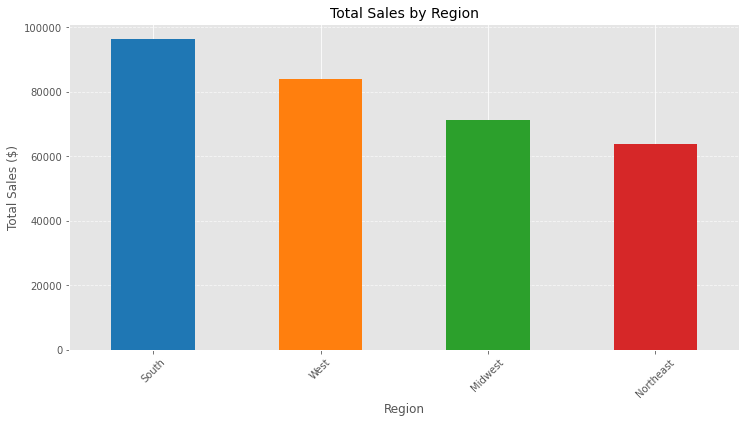

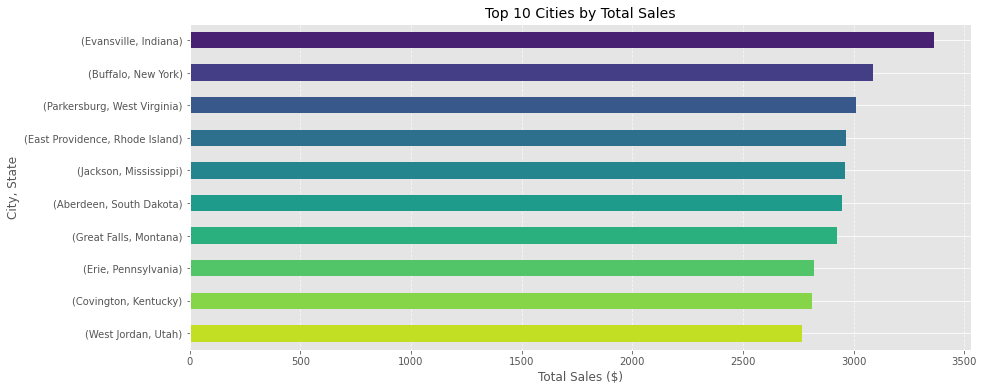

<Figure size 720x576 with 0 Axes>

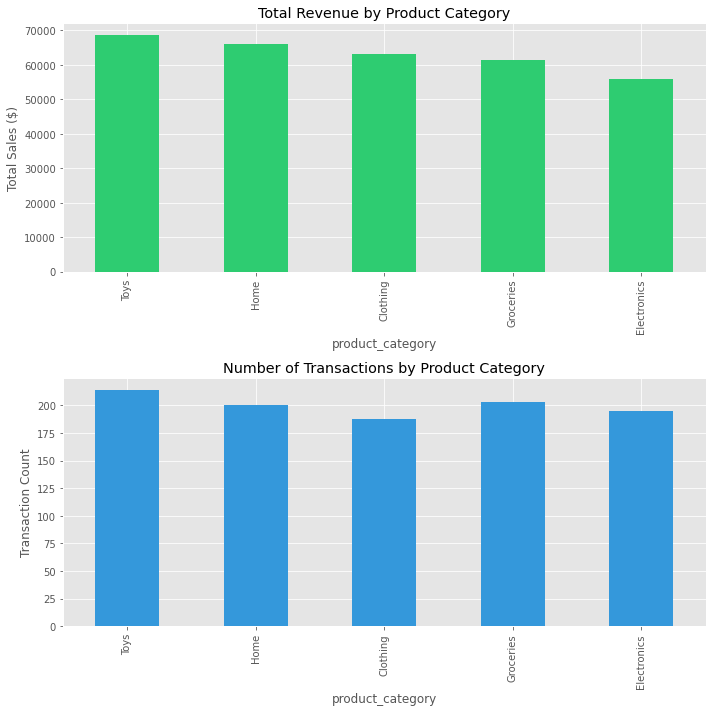

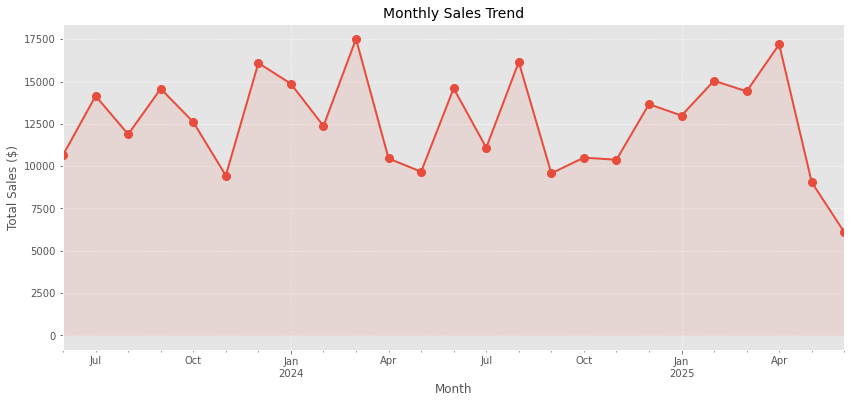

<Figure size 864x432 with 0 Axes>

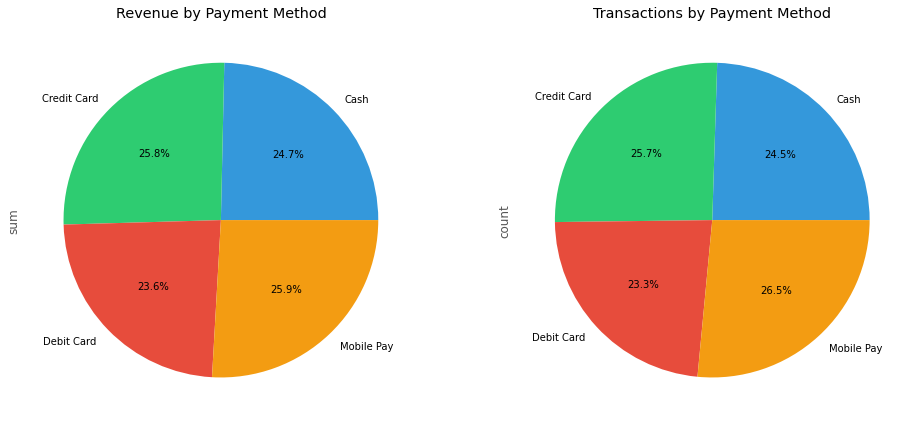

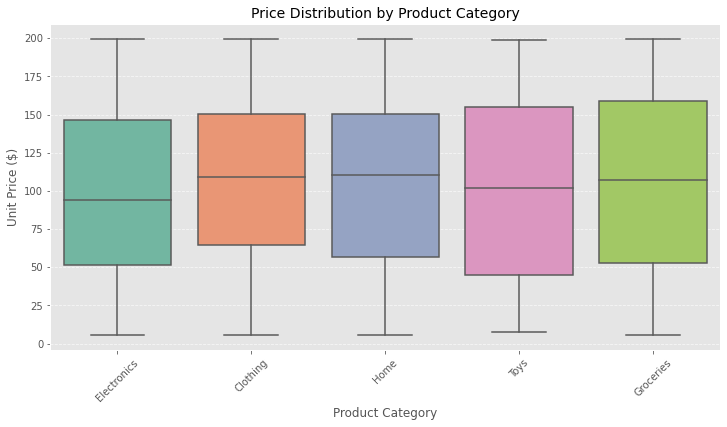

,total_sale,quantity,unit_price
product_name,,,
Size Max,"$2,002.49",14,$143.85
Or Pro,"$1,661.64",13,$121.87
Wish Pro,"$1,541.48",9,$167.81
Audience Lite,"$1,509.08",12,$125.76
Key Max,"$1,392.24",9,$155.00
According Lite,"$1,357.20",7,$193.75
Church Lite,"$1,309.32",10,$110.08
Military Lite,"$1,237.27",7,$177.49
Also Pro,"$1,198.73",8,$135.72


In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
plt.style.use('ggplot')

# Load the data (if not already loaded)
# walmart_df = pd.read_csv('walmart_sales_with_real_cities.csv')

## 1. Sales Distribution by Region
plt.figure(figsize=(12, 6))
region_sales = df.groupby('region')['total_sale'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Total Sales by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 2. Top 10 Cities by Sales
plt.figure(figsize=(14, 6))
top_cities = df.groupby(['city', 'state'])['total_sale'].sum().nlargest(10)
top_cities.plot(kind='barh', color=sns.color_palette('viridis', 10))
plt.title('Top 10 Cities by Total Sales', fontsize=14)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('City, State', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.show()

## 3. Product Category Performance
plt.figure(figsize=(10, 8))
category_stats = df.groupby('product_category').agg({
    'total_sale': ['sum', 'count'],
    'unit_price': 'mean'
}).sort_values(('total_sale', 'sum'), ascending=False)

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Total Sales by Category
category_stats[('total_sale', 'sum')].plot(
    kind='bar', ax=axes[0], color='#2ecc71', title='Total Revenue by Product Category'
)
axes[0].set_ylabel('Total Sales ($)')

# Transaction Count by Category
category_stats[('total_sale', 'count')].plot(
    kind='bar', ax=axes[1], color='#3498db', title='Number of Transactions by Product Category'
)
axes[1].set_ylabel('Transaction Count')

plt.tight_layout()
plt.show()

## 4. Monthly Sales Trend
plt.figure(figsize=(14, 6))
df['sale_date'] = pd.to_datetime(df['sale_date'])
monthly_sales = df.set_index('sale_date').resample('M')['total_sale'].sum()

monthly_sales.plot(
    marker='o',
    linestyle='-',
    color='#e74c3c',
    linewidth=2,
    markersize=8
)
plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.fill_between(monthly_sales.index, monthly_sales.values, color='#e74c3c', alpha=0.1)
plt.show()

## 5. Payment Method Analysis
plt.figure(figsize=(12, 6))
payment_stats = df.groupby('payment_method')['total_sale'].agg(['sum', 'count'])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Payment Method by Revenue
payment_stats['sum'].plot(
    kind='pie', 
    ax=axes[0], 
    autopct='%1.1f%%',
    colors=['#3498db', '#2ecc71', '#e74c3c', '#f39c12'],
    title='Revenue by Payment Method'
)

# Payment Method by Transaction Count
payment_stats['count'].plot(
    kind='pie', 
    ax=axes[1], 
    autopct='%1.1f%%',
    colors=['#3498db', '#2ecc71', '#e74c3c', '#f39c12'],
    title='Transactions by Payment Method'
)

plt.tight_layout()
plt.show()

## 6. Price Distribution by Category
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='product_category',
    y='unit_price',
    palette='Set2'
)
plt.title('Price Distribution by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Unit Price ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 7. Interactive Map of Sales (requires plotly)
try:
    import plotly.express as px
    
    # Aggregate data by city
    city_sales = df.groupby(['city', 'state', 'region'], as_index=False)['total_sale'].sum()
    
    fig = px.scatter_geo(city_sales,
                        lat=city_sales['state'].apply(lambda x: state_centroids[x][0]),
                        lon=city_sales['state'].apply(lambda x: state_centroids[x][1]),
                        size="total_sale",
                        hover_name="city",
                        hover_data=["state", "region", "total_sale"],
                        scope="usa",
                        title="Sales Distribution Across US Cities",
                        color="region",
                        size_max=30)
    fig.show()
except ImportError:
    print("Plotly not installed. Run '!pip install plotly' for geographic visualization")

## 8. Top Selling Products Table
top_products = df.groupby('product_name').agg({
    'total_sale': 'sum',
    'quantity': 'sum',
    'unit_price': 'mean'
}).nlargest(10, 'total_sale').style.format({
    'total_sale': '${:,.2f}',
    'unit_price': '${:,.2f}'
}).background_gradient(cmap='Blues')

display(top_products)

In [94]:
import pandas as pd
import plotly.express as px

# First, let's define state centroids (approximate geographic centers)
state_centroids = {
    'Alabama': [32.806671, -86.791130],
    'Alaska': [61.370716, -152.404419],
    'Arizona': [33.729759, -111.431221],
    'Arkansas': [34.969704, -92.373123],
    'California': [36.116203, -119.681564],
    'Colorado': [39.059811, -105.311104],
    'Connecticut': [41.597782, -72.755371],
    'Delaware': [39.318523, -75.507141],
    'Florida': [27.766279, -81.686783],
    'Georgia': [33.040619, -83.643074],
    'Hawaii': [21.094318, -157.498337],
    'Idaho': [44.240459, -114.478828],
    'Illinois': [40.349457, -88.986137],
    'Indiana': [39.849426, -86.258278],
    'Iowa': [42.011539, -93.210526],
    'Kansas': [38.526600, -96.726486],
    'Kentucky': [37.668140, -84.670067],
    'Louisiana': [31.169546, -91.867805],
    'Maine': [44.693947, -69.381927],
    'Maryland': [39.063946, -76.802101],
    'Massachusetts': [42.230171, -71.530106],
    'Michigan': [43.326618, -84.536095],
    'Minnesota': [45.694454, -93.900192],
    'Mississippi': [32.741646, -89.678696],
    'Missouri': [38.456085, -92.288368],
    'Montana': [46.921925, -110.454353],
    'Nebraska': [41.125370, -98.268082],
    'Nevada': [38.313515, -117.055374],
    'New Hampshire': [43.452492, -71.563896],
    'New Jersey': [40.298904, -74.521011],
    'New Mexico': [34.840515, -106.248482],
    'New York': [42.165726, -74.948051],
    'North Carolina': [35.630066, -79.806419],
    'North Dakota': [47.528912, -99.784012],
    'Ohio': [40.388783, -82.764915],
    'Oklahoma': [35.565342, -96.928917],
    'Oregon': [44.572021, -122.070938],
    'Pennsylvania': [40.590752, -77.209755],
    'Rhode Island': [41.680893, -71.511780],
    'South Carolina': [33.856892, -80.945007],
    'South Dakota': [44.299782, -99.438828],
    'Tennessee': [35.747845, -86.692345],
    'Texas': [31.054487, -97.563461],
    'Utah': [40.150032, -111.862434],
    'Vermont': [44.045876, -72.710686],
    'Virginia': [37.769337, -78.169968],
    'Washington': [47.400902, -121.490494],
    'West Virginia': [38.491226, -80.954453],
    'Wisconsin': [44.268543, -89.616508],
    'Wyoming': [42.755966, -107.302490]
}

# Aggregate data by state
state_sales = df.groupby('state', as_index=False)['total_sale'].sum()

# Add centroid coordinates
state_sales['lat'] = state_sales['state'].apply(lambda x: state_centroids[x][0])
state_sales['lon'] = state_sales['state'].apply(lambda x: state_centroids[x][1])

# Create the map visualization
fig = px.scatter_geo(state_sales,
                    lat='lat',
                    lon='lon',
                    size='total_sale',
                    hover_name='state',
                    hover_data=['total_sale'],
                    scope='usa',
                    title='Walmart Sales Distribution by State',
                    size_max=30,
                    color='total_sale',
                    color_continuous_scale='Viridis')

# Customize the layout
fig.update_layout(
    geo=dict(
        landcolor='rgb(217, 217, 217)',
        lakecolor='rgb(255, 255, 255)',
        subunitcolor='rgb(255, 255, 255)',
        countrycolor='rgb(255, 255, 255)',
        showlakes=True,
        showsubunits=True,
        showcountries=True
    ),
    margin={"r":0,"t":40,"l":0,"b":0}
)

fig.show()

In [97]:
%sql SELECT DISTINCT region FROM sales;

 * sqlite:///walmart_sales.db
Done.


region
Midwest
South
Northeast
West


In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Load your data (if not already loaded)
# df = pd.read_csv('walmart_sales.csv')

# Aggregate sales by region
region_sales = df.groupby('region')['total_sale'].sum().sort_values(ascending=False)
region_counts = df['region'].value_counts()

print("Total Sales by Region:")
display(region_sales)

Total Sales by Region:


region
South        96216.09
West         83764.18
Midwest      71279.97
Northeast    63806.22
Name: total_sale, dtype: float64

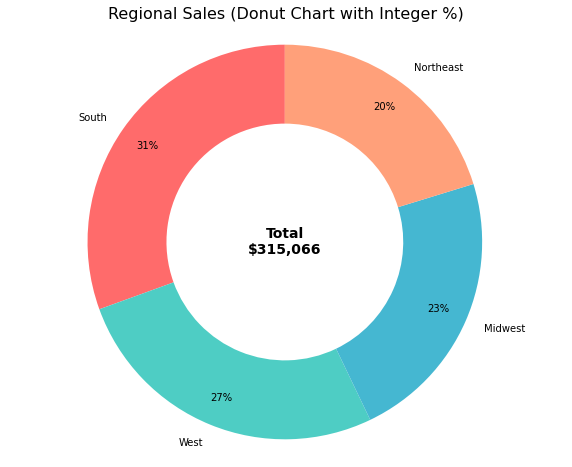

In [99]:
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    region_sales,
    labels=region_sales.index,
    autopct=lambda p: f'{p:.0f}%',
    startangle=90,
    colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'],
    pctdistance=0.85,
    wedgeprops={'width':0.4}
)

# Add center circle
plt.gca().add_artist(plt.Circle((0,0), 0.3, color='white'))

# Add total value in center
plt.text(0, 0, 
         f"Total\n${sum(region_sales):,.0f}", 
         ha='center', 
         va='center',
         fontsize=14,
         fontweight='bold')

plt.title('Regional Sales (Donut Chart with Integer %)', fontsize=16)
plt.axis('equal')
plt.show()

In [101]:
%sql SELECT * FROM sales

 * sqlite:///walmart_sales.db
Done.


sale_id,sale_date,city,state,region,product_category,product_name,quantity,unit_price,total_sale,payment_method,customer_id
29e8ad69-371d-4e94-8e2e-39a685593e89,2025-01-23,Sioux Falls,South Dakota,Midwest,Electronics,Western Lite,2,48.53,97.06,Credit Card,CUST98696
172a4a0b-809a-4965-b787-2a819d4b5e90,2024-05-14,Wheeling,West Virginia,South,Electronics,Home Basic,1,10.81,10.81,Debit Card,CUST40495
0e309a45-0d2b-47b6-9a9b-ef2947616740,2024-01-07,Winston-Salem,North Carolina,South,Electronics,Size Max,5,86.81,434.05,Mobile Pay,CUST87236
ff37941b-0372-45a5-b49c-3faac88dd403,2024-09-22,New Orleans,Louisiana,South,Clothing,Six Basic,3,59.18,177.54,Debit Card,CUST54118
bfe8aa82-d399-4ec2-87ee-daccf7b06dd5,2024-01-02,Bridgeport,Connecticut,Northeast,Home,Debate Pro,3,170.26,510.78,Cash,CUST15695
83db3d58-baf9-4f50-a9fe-3bc13f3f6302,2024-05-19,Vancouver,Washington,West,Toys,Mr Pro,4,20.37,81.48,Cash,CUST92397
b13a1db1-ba63-405a-abfe-439ceebd19f6,2024-08-08,North Charleston,South Carolina,South,Toys,Remain Max,1,13.94,13.94,Debit Card,CUST47930
b345a185-2b81-46da-b72f-107aa26439cc,2024-08-31,Colorado Springs,Colorado,West,Electronics,Today Basic,3,93.42,280.26,Cash,CUST31319
3c8b8d0c-c5dd-4256-a41e-82e93a6c7d31,2023-08-20,Southaven,Mississippi,South,Clothing,Past Lite,1,123.78,123.78,Debit Card,CUST80010
f1a53158-2d40-4290-bfb9-fe05167d1a8a,2024-10-14,Spokane,Washington,West,Clothing,Power Basic,4,57.64,230.56,Debit Card,CUST99733


In [102]:
%sql SELECT DISTINCT product_category FROM sales

 * sqlite:///walmart_sales.db
Done.


product_category
Electronics
Clothing
Home
Toys
Groceries


In [103]:
%sql SELECT DISTINCT product_name FROM sales

 * sqlite:///walmart_sales.db
Done.


product_name
Western Lite
Home Basic
Size Max
Six Basic
Debate Pro
Mr Pro
Remain Max
Today Basic
Past Lite
Power Basic


In [104]:
import plotly.express as px

fig = px.pie(
    df,
    values='total_sale',
    names='product_category',
    title='Sales by Product Category',
    hole=0.3,
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(
    textposition='inside',
    textinfo='percent+value',
    hovertemplate="<b>%{label}</b><br>Sales: $%{value:,.0f}<br>Percent: %{percent}",
    marker=dict(line=dict(color='#FFFFFF', width=2))
)

fig.update_layout(
    uniformtext_minsize=12,
    uniformtext_mode='hide',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.2,
        xanchor="center",
        x=0.5
    ),
    annotations=[dict(text=f"Total<br>${df['total_sale'].sum():,.0f}", 
                     x=0.5, y=0.5, font_size=14, showarrow=False)]
)

fig.show()

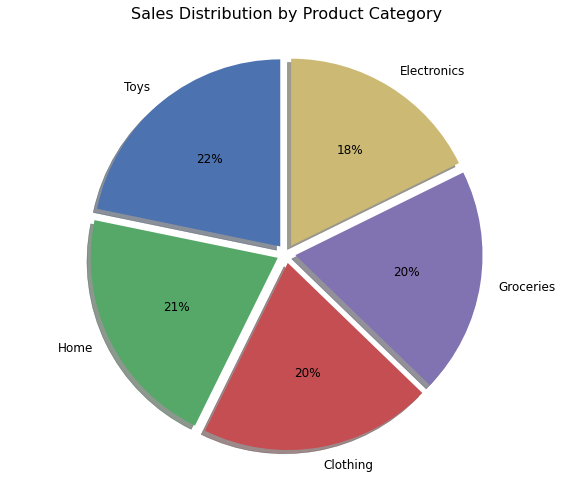

In [105]:
import matplotlib.pyplot as plt

# Aggregate sales by product category
category_sales = df.groupby('product_category')['total_sale'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
plt.pie(
    category_sales,
    labels=category_sales.index,
    autopct=lambda p: f'{p:.0f}%',
    startangle=90,
    colors=['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974'],
    explode=[0.05]*len(category_sales),  # Slightly separate all slices
    shadow=True,
    textprops={'fontsize': 12}
)

plt.title('Sales Distribution by Product Category', fontsize=16, pad=20)
plt.axis('equal')  # Ensures pie is circular
plt.show()

In [106]:
%sql SELECT * from sales

 * sqlite:///walmart_sales.db
Done.


sale_id,sale_date,city,state,region,product_category,product_name,quantity,unit_price,total_sale,payment_method,customer_id
29e8ad69-371d-4e94-8e2e-39a685593e89,2025-01-23,Sioux Falls,South Dakota,Midwest,Electronics,Western Lite,2,48.53,97.06,Credit Card,CUST98696
172a4a0b-809a-4965-b787-2a819d4b5e90,2024-05-14,Wheeling,West Virginia,South,Electronics,Home Basic,1,10.81,10.81,Debit Card,CUST40495
0e309a45-0d2b-47b6-9a9b-ef2947616740,2024-01-07,Winston-Salem,North Carolina,South,Electronics,Size Max,5,86.81,434.05,Mobile Pay,CUST87236
ff37941b-0372-45a5-b49c-3faac88dd403,2024-09-22,New Orleans,Louisiana,South,Clothing,Six Basic,3,59.18,177.54,Debit Card,CUST54118
bfe8aa82-d399-4ec2-87ee-daccf7b06dd5,2024-01-02,Bridgeport,Connecticut,Northeast,Home,Debate Pro,3,170.26,510.78,Cash,CUST15695
83db3d58-baf9-4f50-a9fe-3bc13f3f6302,2024-05-19,Vancouver,Washington,West,Toys,Mr Pro,4,20.37,81.48,Cash,CUST92397
b13a1db1-ba63-405a-abfe-439ceebd19f6,2024-08-08,North Charleston,South Carolina,South,Toys,Remain Max,1,13.94,13.94,Debit Card,CUST47930
b345a185-2b81-46da-b72f-107aa26439cc,2024-08-31,Colorado Springs,Colorado,West,Electronics,Today Basic,3,93.42,280.26,Cash,CUST31319
3c8b8d0c-c5dd-4256-a41e-82e93a6c7d31,2023-08-20,Southaven,Mississippi,South,Clothing,Past Lite,1,123.78,123.78,Debit Card,CUST80010
f1a53158-2d40-4290-bfb9-fe05167d1a8a,2024-10-14,Spokane,Washington,West,Clothing,Power Basic,4,57.64,230.56,Debit Card,CUST99733


In [107]:
%sql SELECT city from sales where state IS 'Texas'

 * sqlite:///walmart_sales.db
Done.


city
Fort Worth
Fort Worth
San Antonio
Austin
Dallas
Dallas
Fort Worth
Houston
San Antonio
Austin


In [108]:
# Filter for Texas cities and aggregate sales
texas_sales = df[df['state'] == 'Texas'].groupby('city')['total_sale'].sum().sort_values(ascending=False)

print("Top Texas Cities by Sales:")
print(texas_sales.head())

Top Texas Cities by Sales:
city
Fort Worth     2483.02
Houston        1674.63
Dallas         1464.49
San Antonio    1216.83
Austin          913.45
Name: total_sale, dtype: float64


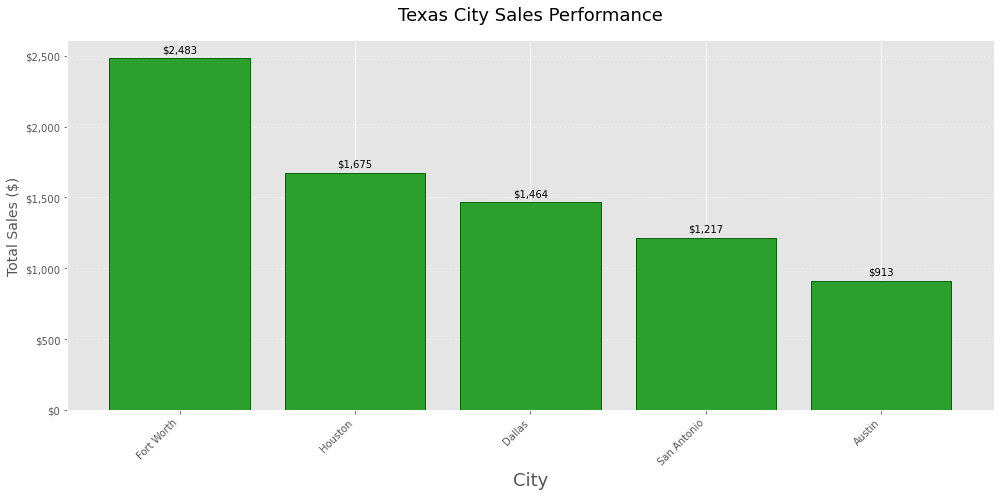

In [109]:
plt.figure(figsize=(14, 7))
bars = plt.bar(
    texas_sales.index,
    texas_sales.values,
    color='#2ca02c',  # Green color
    edgecolor='darkgreen',
    linewidth=1
)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2., 
        height + max(texas_sales)*0.01,  # Slightly above bar
        f'${height:,.0f}',
        ha='center', 
        va='bottom',
        fontsize=10
    )

plt.title('Texas City Sales Performance', fontsize=18, pad=20)
plt.xlabel('City', fontsize=18)
plt.ylabel('Total Sales ($)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Format y-axis with dollar signs
plt.gca().yaxis.set_major_formatter('${x:,.0f}')

plt.tight_layout()
plt.show()